In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical

In [2]:
df = pd.read_csv('/content/drug200.csv')
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


In [3]:
df.tail()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
195,56,F,LOW,HIGH,11.567,drugC
196,16,M,LOW,HIGH,12.006,drugC
197,52,M,NORMAL,HIGH,9.894,drugX
198,23,M,NORMAL,NORMAL,14.020,drugX
199,40,F,LOW,NORMAL,11.349,drugX


In [4]:
df.describe(include='all')

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
count,200.000000,200,200,200,200.000000,200
unique,NaN,2,3,2,NaN,5
top,NaN,M,HIGH,HIGH,NaN,DrugY
freq,NaN,104,77,103,NaN,91
mean,44.315000,NaN,NaN,NaN,16.084485,NaN
std,16.544315,NaN,NaN,NaN,7.223956,NaN
min,15.000000,NaN,NaN,NaN,6.269000,NaN
25%,31.000000,NaN,NaN,NaN,10.445500,NaN
50%,45.000000,NaN,NaN,NaN,13.936500,NaN
75%,58.000000,NaN,NaN,NaN,19.380000,NaN


In [5]:
df.isnull().sum()

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


In [8]:
df = df.dropna()

<Axes: >

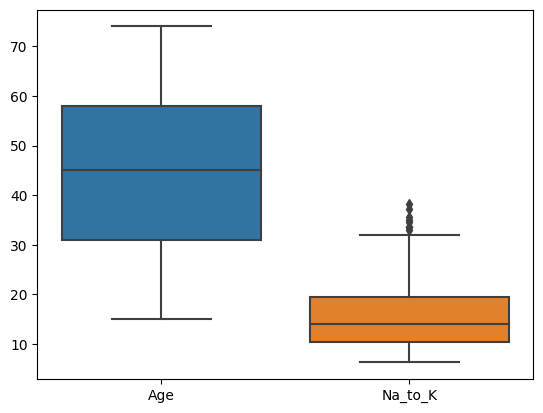

In [9]:
sns.boxplot(df)

<Axes: >

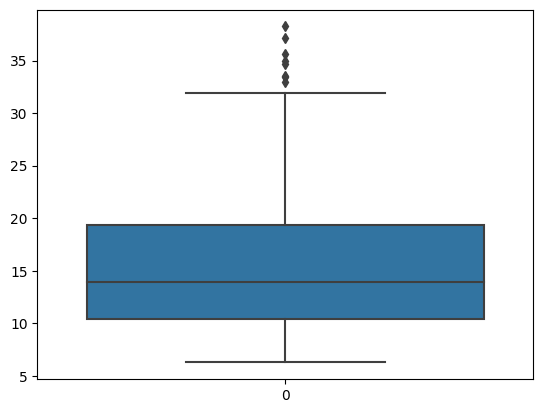

In [10]:
sns.boxplot(df['Na_to_K'])

In [13]:
#Outliner Remover

q1 = df.Na_to_K.quantile(.25)
q3 = df.Na_to_K.quantile(.75)

In [14]:
q1

10.4455

In [15]:
q3

19.38

In [16]:
IQR = q3 - q1
IQR

8.9345

In [17]:
upper_limit = q3+1.5*IQR
lower_limit = q1-1.5*IQR

In [18]:
upper_limit

32.78175

In [19]:
df = df[df.Na_to_K<upper_limit]

<Axes: >

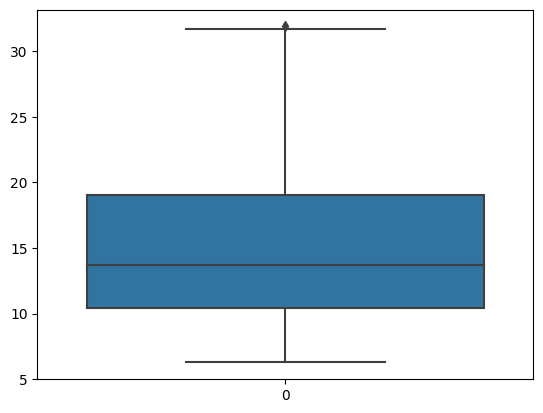

In [20]:
sns.boxplot(df['Na_to_K'])

In [21]:
df_encoded = pd.get_dummies(df, columns=['Sex', 'BP', 'Cholesterol'], drop_first=True)
df_encoded

,Age,Na_to_K,Drug,Sex_M,BP_LOW,BP_NORMAL,Cholesterol_NORMAL
0,23,25.355,DrugY,0,0,0,0
1,47,13.093,drugC,1,1,0,0
2,47,10.114,drugC,1,1,0,0
3,28,7.798,drugX,0,0,1,0
4,61,18.043,DrugY,0,1,0,0
...,...,...,...,...,...,...,...
195,56,11.567,drugC,0,1,0,0
196,16,12.006,drugC,1,1,0,0
197,52,9.894,drugX,1,0,1,0
198,23,14.020,drugX,1,0,1,1


In [22]:
df['Drug'].unique()

array(['DrugY', 'drugC', 'drugX', 'drugA', 'drugB'], dtype=object)

In [23]:
df['Drug'].value_counts()

DrugY    83
drugX    54
drugA    23
drugC    16
drugB    16
Name: Drug, dtype: int64

In [24]:
x = df_encoded.drop('Drug', axis=1) 
x

,Age,Na_to_K,Sex_M,BP_LOW,BP_NORMAL,Cholesterol_NORMAL
0,23,25.355,0,0,0,0
1,47,13.093,1,1,0,0
2,47,10.114,1,1,0,0
3,28,7.798,0,0,1,0
4,61,18.043,0,1,0,0
...,...,...,...,...,...,...
195,56,11.567,0,1,0,0
196,16,12.006,1,1,0,0
197,52,9.894,1,0,1,0
198,23,14.020,1,0,1,1


In [27]:
y = pd.get_dummies(df_encoded['Drug']).values
y

array([[1, 0, 0, 0, 0],
       [0, 0, 0, 1, 0],
       [0, 0, 0, 1, 0],
       [0, 0, 0, 0, 1],
       [1, 0, 0, 0, 0],
       [0, 0, 0, 0, 1],
       [1, 0, 0, 0, 0],
       [0, 0, 0, 1, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [0, 0, 0, 1, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [0, 0, 0, 0, 1],
       [1, 0, 0, 0, 0],
       [0, 0, 0, 0, 1],
       [0, 1, 0, 0, 0],
       [0, 0, 0, 1, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [0, 0, 0, 0, 1],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [0, 0, 0, 0, 1],
       [0, 0, 1, 0, 0],
       [0, 0, 0, 0, 1],
       [1, 0, 0, 0, 0],
       [0, 0, 0, 0, 1],
       [0, 0, 0, 0, 1],
       [0, 1, 0, 0, 0],
       [0, 0, 0, 0, 1],
       [0, 0, 0, 0, 1],
       [0, 0, 0, 0, 1],
       [1, 0, 0, 0, 0],
       [0, 0, 1, 0, 0],
       [1, 0, 0,

In [29]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [31]:
x.shape, y.shape

((192, 6), (192, 5))

In [32]:
x_train.shape, x_test.shape

((153, 6), (39, 6))

In [33]:
y_train.shape, y_test.shape

((153, 5), (39, 5))

In [34]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [49]:
# Step 2: Build the ANN model
model = Sequential()
model.add(Dense(8,input_dim=6,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(26,activation='relu'))
model.add(Dense(5,activation='softmax'))

In [50]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [51]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_13 (Dense)            (None, 8)                 56        
                                                                 
 dense_14 (Dense)            (None, 32)                288       
                                                                 
 dense_15 (Dense)            (None, 26)                858       
                                                                 
 dense_16 (Dense)            (None, 5)                 135       
                                                                 
Total params: 1,337
Trainable params: 1,337
Non-trainable params: 0
_________________________________________________________________


In [52]:
model.fit(x_train,y_train,epochs=10,batch_size=5,validation_data=(x_test,y_test))

Epoch 1/10
31/31 [==============================] - 2s 12ms/step - loss: 1.5557 - accuracy: 0.3595 - val_loss: 1.4272 - val_accuracy: 0.4615
Epoch 2/10
31/31 [==============================] - 0s 4ms/step - loss: 1.3916 - accuracy: 0.4771 - val_loss: 1.3120 - val_accuracy: 0.4615
Epoch 3/10
31/31 [==============================] - 0s 3ms/step - loss: 1.2454 - accuracy: 0.5163 - val_loss: 1.2252 - val_accuracy: 0.4872
Epoch 4/10
31/31 [==============================] - 0s 4ms/step - loss: 1.1246 - accuracy: 0.5882 - val_loss: 1.1416 - val_accuracy: 0.5385
Epoch 5/10
31/31 [==============================] - 0s 5ms/step - loss: 1.0363 - accuracy: 0.6275 - val_loss: 1.0681 - val_accuracy: 0.6154
Epoch 6/10
31/31 [==============================] - 0s 5ms/step - loss: 0.9609 - accuracy: 0.6536 - val_loss: 0.9972 - val_accuracy: 0.6410
Epoch 7/10
31/31 [==============================] - 0s 5ms/step - loss: 0.9007 - accuracy: 0.6667 - val_loss: 0.9421 - val_accuracy: 0.6410
Epoch 8/10
31/31 [=

In [54]:
loss, accuracy = model.evaluate(x_test, y_test)
print(f'Test Loss: {loss:.4f}')
print(f'Test Accuracy: {accuracy:.4f}')

2/2 [==============================] - 0s 14ms/step - loss: 0.8053 - accuracy: 0.6667
Test Loss: 0.8053
Test Accuracy: 0.6667


In [57]:
model.predict([[47,13.093,1,1,0,0]])

1/1 [==============================] - 0s 103ms/step


array([[1.0000000e+00, 0.0000000e+00, 7.3195206e-27, 1.0033935e-37,
        3.7354973e-33]], dtype=float32)